In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("RealEstateAU_1000_Samples.csv")
df

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.0,3.0,6.0,2022-05-27 15:54:05
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.0,2.0,2.0,2022-05-27 15:54:05
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.0,2.0,3.0,2022-05-27 15:54:05


In [4]:
# 필요없는 변수 제거
df = df.drop(['index'], axis=1)

### 결측치 확인

In [5]:
df.isnull().sum()

TID                   0
breadcrumb            0
category_name         0
property_type         0
building_size       720
land_size           467
preferred_size      391
open_date           698
listing_agency        0
price                 0
location_number       0
location_type         0
location_name         0
address              12
address_1            12
city                  0
state                 0
zip_code              0
phone                 0
latitude           1000
longitude          1000
product_depth         0
bedroom_count        33
bathroom_count       33
parking_count        33
RunDate               0
dtype: int64

In [6]:
# building_size와 open_date는 50% 넘게 결측되었고 latitude와 longitude는 다 결측되었으므로 변수 자체 삭제
df1 = df.drop(["building_size","open_date","latitude","longitude"], axis=1)
df1.head()

,TID,breadcrumb,category_name,property_type,land_size,preferred_size,listing_agency,price,location_number,location_type,...,address_1,city,state,zip_code,phone,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,Professionals - DARWIN CITY,"$435,000",139468611,Buy,...,44 Woods Street,Darwin City,NT,800,08 8941 8289,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,NaN,171m²,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,Buy,...,14/14 Dashwood Place,Darwin City,NT,800,0411724000,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Buy,...,13/86 Woods Street,Darwin City,NT,800,08 8981 0080,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,Ray White - NIGHTCLIFF,"$259,000",139451679,Buy,...,1309/43B Knuckey Street,Darwin City,NT,800,08 8982 2403,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,201m²,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Buy,...,3/10 McLachlan Street,Darwin City,NT,800,0418885966,premiere,3.0,2.0,2.0,2022-05-27 15:54:05


In [7]:
# 중복행 확인 -> 없음
df1[df1.duplicated(keep=False)]

,TID,breadcrumb,category_name,property_type,land_size,preferred_size,listing_agency,price,location_number,location_type,...,address_1,city,state,zip_code,phone,product_depth,bedroom_count,bathroom_count,parking_count,RunDate


### 결측치 시각화

<AxesSubplot:>

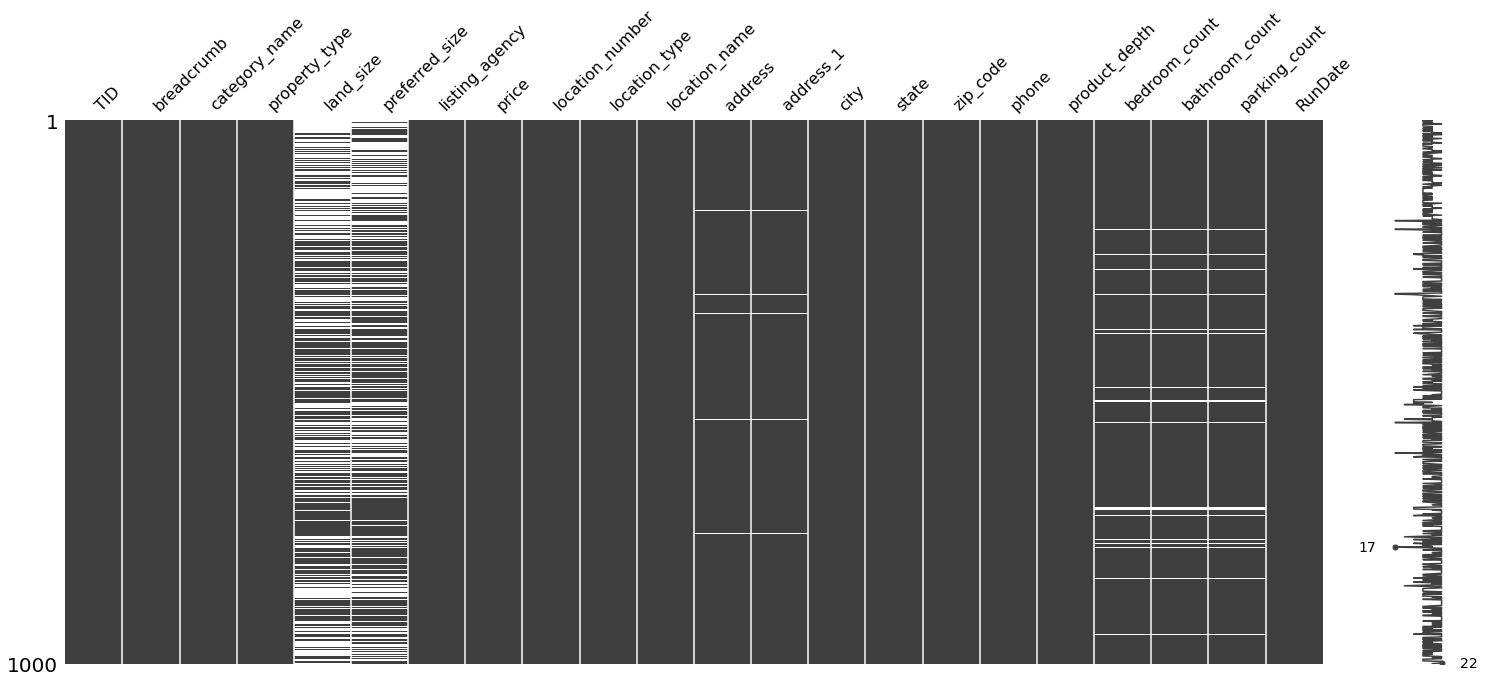

In [8]:
msno.matrix(df1.iloc[:,:])

<AxesSubplot:>

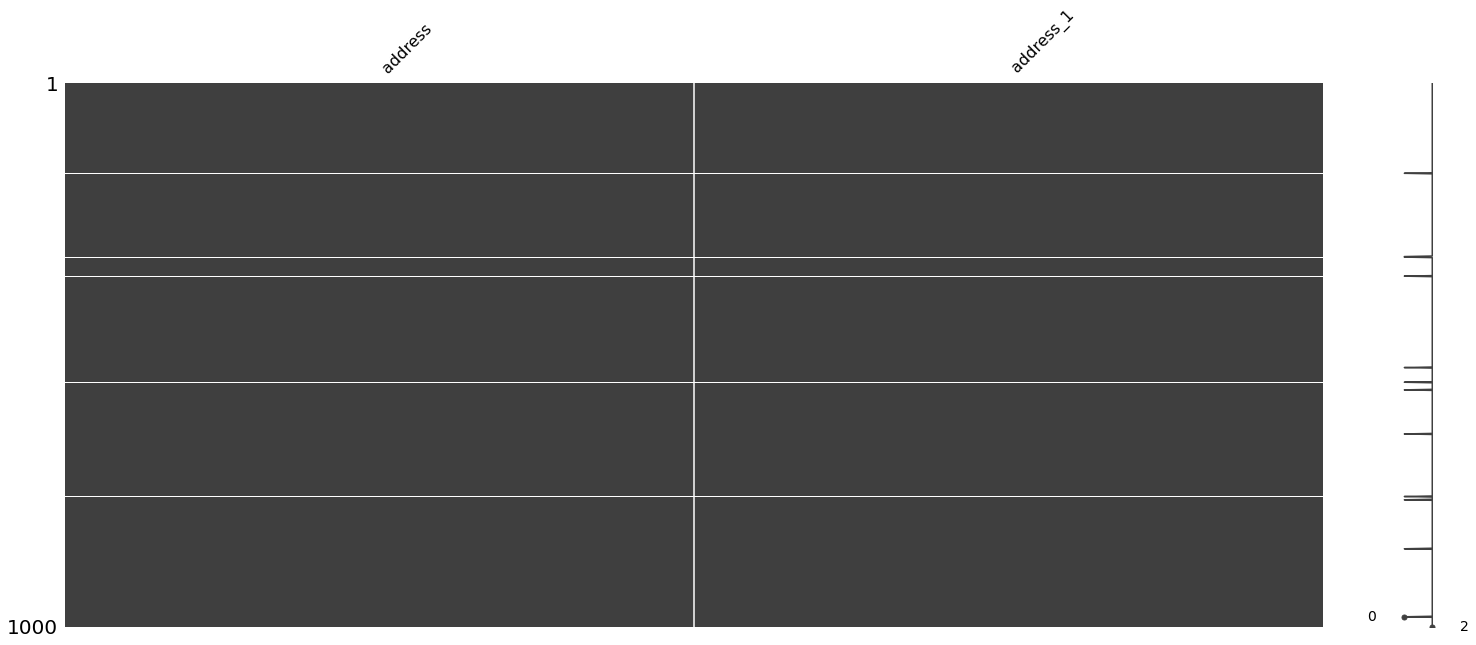

In [9]:
msno.matrix(df1[["address","address_1"]])

- address, address_1 변수는 다 같이 결측됨

<AxesSubplot:>

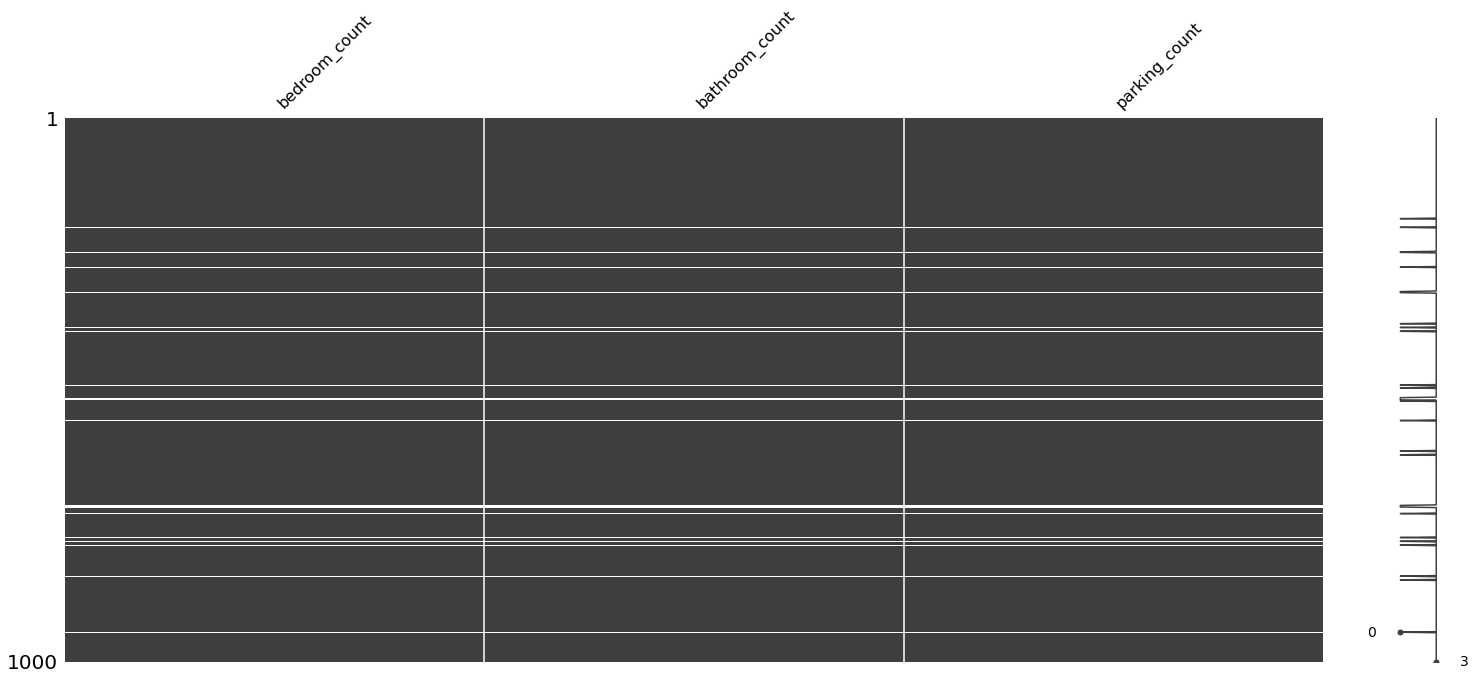

In [10]:
msno.matrix(df1[["bedroom_count", "bathroom_count", "parking_count"]])

- bedroom_count, bathroom_count, parking_count 변수는 다 같이 결측됨

### 변수 land size와 preferred size : 수치형으로 변환 후 두 변수간의 관계 파악

In [11]:
temp = df1.copy()

In [12]:
size_col = ["land_size","preferred_size"]

In [13]:
# 숫자만 남기기
for col in size_col:
    temp[col] = temp[col].map(lambda x: re.sub(r"[^0-9.]", "", str(x)))

In [14]:
# object형 수치형으로 변환
temp['land_size'] = pd.to_numeric(temp['land_size'])
temp['preferred_size'] = pd.to_numeric(temp['preferred_size'])

In [15]:
temp.head()

,TID,breadcrumb,category_name,property_type,land_size,preferred_size,listing_agency,price,location_number,location_type,...,address_1,city,state,zip_code,phone,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,Professionals - DARWIN CITY,"$435,000",139468611,Buy,...,44 Woods Street,Darwin City,NT,800,08 8941 8289,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,NaN,171.0,Nick Mousellis Real Estate - Eview Group Member,"Offers Over $320,000",139463755,Buy,...,14/14 Dashwood Place,Darwin City,NT,800,0411724000,premiere,3.0,2.0,2.0,2022-05-27 15:54:05
2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,Habitat Real Estate - THE GARDENS,"$310,000",139462495,Buy,...,13/86 Woods Street,Darwin City,NT,800,08 8981 0080,premiere,2.0,1.0,1.0,2022-05-27 15:54:05
3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,Ray White - NIGHTCLIFF,"$259,000",139451679,Buy,...,1309/43B Knuckey Street,Darwin City,NT,800,08 8982 2403,premiere,1.0,1.0,0.0,2022-05-27 15:54:05
4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,201.0,Carol Need Real Estate - Fannie Bay,"$439,000",139433803,Buy,...,3/10 McLachlan Street,Darwin City,NT,800,0418885966,premiere,3.0,2.0,2.0,2022-05-27 15:54:05


<AxesSubplot:>

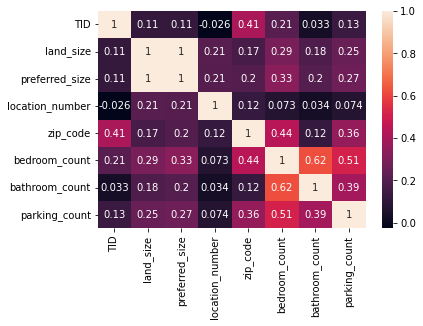

In [16]:
sns.heatmap(temp.corr(), annot=True)

**-> land_size와 preferred_size의 상관계수는 1로 동일한 정보라고 판단**

**-> land_size와 preferred_size의 결측치를 서로 대체하여 보완**

In [17]:
# 결측치 보완한 새로운 변수 land_size_new 생성
df1['land_size_new'] = np.where(pd.notnull(df1['preferred_size']) == True, df1['preferred_size'], df1['land_size'])

In [18]:
# 보완을 통하여 land_size_new의 결측값이 343개로 적은 것을 확인
df1.isnull().sum()

TID                  0
breadcrumb           0
category_name        0
property_type        0
land_size          467
preferred_size     391
listing_agency       0
price                0
location_number      0
location_type        0
location_name        0
address             12
address_1           12
city                 0
state                0
zip_code             0
phone                0
product_depth        0
bedroom_count       33
bathroom_count      33
parking_count       33
RunDate              0
land_size_new      343
dtype: int64

In [19]:
# preferred_size와 land_size는 삭제
df2 = df1.drop(["preferred_size", "land_size"], axis=1)

### land_size_new 변수의 m^2, ha 단위 : m^2으로 통일
- 1 ha = 10000 m^2

In [20]:
# ha 단위는 m2으로 변환 
def haTom2(size):
    if "ha" in str(size):
        size = re.sub(r"[^0-9.]", "", size)
        ha_num = float(size)
        m2 = ha_num * 10000
        return m2
    else:
        return size

In [21]:
df3 = df2.copy()

In [22]:
df3["land_size_new"] = df3["land_size_new"].apply(haTom2)

In [23]:
df3["land_size_new"]

0          NaN
1        171m²
2          NaN
3          NaN
4        201m²
        ...   
995    91700.0
996      600m²
997      800m²
998      450m²
999      120m²
Name: land_size_new, Length: 1000, dtype: object

### m^2 단위 기호 삭제

In [24]:
# 숫자만 남기기
df3["land_size_new"] = df3["land_size_new"].map(lambda x: re.sub(r"[^0-9.]", "", str(x)))

In [25]:
# object형 수치형으로 변환
df3['land_size_new'] = pd.to_numeric(df3['land_size_new'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TID              1000 non-null   int64  
 1   breadcrumb       1000 non-null   object 
 2   category_name    1000 non-null   object 
 3   property_type    1000 non-null   object 
 4   listing_agency   1000 non-null   object 
 5   price            1000 non-null   object 
 6   location_number  1000 non-null   int64  
 7   location_type    1000 non-null   object 
 8   location_name    1000 non-null   object 
 9   address          988 non-null    object 
 10  address_1        988 non-null    object 
 11  city             1000 non-null   object 
 12  state            1000 non-null   object 
 13  zip_code         1000 non-null   int64  
 14  phone            1000 non-null   object 
 15  product_depth    1000 non-null   object 
 16  bedroom_count    967 non-null    float64
 17  bathroom_count 

## price 변수 수치형으로 전처리

In [26]:
# Over(over)와 + 기호가 포함된 데이터 확인
filter = df3["price"].str.contains("over|Over") | df3["price"].str.contains(r"[+]")
df3[filter]["price"]

1                Offers Over $320,000
15     Overs Over $599,000 Considered
21               Offers Over $440,000
24                         $305,000 +
25                         $295,000 +
                    ...              
965              Offers Over $480,000
970              Offers over $450,000
972              Offers Over $630,000
985              Offers over $370,000
989              Offers over $740,000
Name: price, Length: 157, dtype: object

In [27]:
# $가 2번 들어가 있는 데이터 확인
df3[df3["price"].apply(lambda x: x.count("$"))==2]["price"]

120    $555,000 Furnished Pool ,Gym LEASED: $640 per ...
153                                  $280,000 to$300,000
162                                    $200,000-$250,000
174                                  $200,000 - $220,000
273                        Price guide-$275,000-$325,000
414                     Price Guide: $700,000 - $720,000
442                     Price Guide: $520,000 - $550,000
496         Accepting Offers Between $275,000 - $295,000
523                          $729,000 DHA lease $934 pwk
654                     Price Guide: $650,000 - $700,000
700                            Range $600,000 - $650,000
831                                  $525,000 - $535,000
968                                  $585,000 & $595,000
Name: price, dtype: object

In [41]:
def price_new(price):
    # +와 Over(over)가 포함된 경우 5000 더하기
    if ("Over" in price) or ("over" in price) or (r"[+]" in price):
        price_str = re.sub(r"[^0-9]", "", price) #숫자만 남기기
        price_num = float(price_str) + 5000
        return price_num
    # $ 기호가 2개 포함된 경우
    elif price.count("$")==2:
        # 중간에 - , to , & 기호가 포함된 경우는 평균으로 변환
        if "-" in price or "to" in price or "&" in price:
            # 숫자랑 , 기호 제외한 것을 $로 대체한 후 $ 기준으로 분리
            arr = re.sub('[^0-9,]+', '$', price).replace(",", "").split("$")
            l = list(filter(None,arr)) 
            price_num = np.mean([float(i) for i in l])
            return price_num
        # 523번과 같은 경우에는 729000만 남기기
        else:
            price_str = price.split(" ")[0]
            price_num = float(re.sub(r'[^0-9]', '', price_str))
            return price_num
    # $ 기호가 1개 포함된 경우는 숫자만 남기기
    elif price.count("$")==1:
        price_num = float(re.sub(r'[^0-9]', '', price))
        return price_num
    # $ 기호 없이 문자로만 구성된 경우는 일단 결측값으로 처리
    else:
        price = np.nan
        return price

In [42]:
df4 = df3.copy()

In [43]:
df4["price"]=df3["price"].apply(price_new)
df4["price"]

0      435000.0
1      325000.0
2      310000.0
3      259000.0
4      439000.0
         ...   
995         NaN
996    601000.0
997    655000.0
998    675000.0
999    399000.0
Name: price, Length: 1000, dtype: float64

In [44]:
# 다 문자였던 price를 알 수 없는 값들은 평균으로 대체
df4["price"] = df4["price"].fillna(df4["price"].mean())

In [45]:
df4["price"].info() # 결측치 없음 및 float형 확인

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


### object형인 adress 변수 : 위도, 경도로 변환

In [47]:
# 주소를 위도 경도로 변환하는 함수
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'australia', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}
    return crd

In [49]:
# address가 결측치인 행 제거
df5 = df4.dropna(subset='address')

In [50]:
# 빈 데이터프레임 생성
address_latlng = pd.DataFrame(columns=['address', 'latitude','longitude'])

In [51]:
for address in df5['address']:
    try:
        lat = geocoding(address)['lat']
        lng = geocoding(address)['lng']
        address_latlng = address_latlng.append(pd.DataFrame([[address, lat, lng]], columns=['address', 'latitude','longitude']), ignore_index=True)
    # 변환이 되지 않는 주소는 결측값으로 일단 채우기
    except:
        address_latlng = address_latlng.append(pd.DataFrame([[address, np.nan, np.nan]], columns=['address', 'latitude','longitude']), ignore_index=True)

In [52]:
address_latlng

,address,latitude,longitude
0,"44 Woods Street, Darwin City, NT 0800",-12.4573866,130.8399047
1,"14/14 Dashwood Place, Darwin City, NT 0800",-12.4562928,130.8375883
2,"13/86 Woods Street, Darwin City, NT 0800",-12.4573866,130.8399047
3,"1309/43B Knuckey Street, Darwin City, NT 0800",NaN,NaN
4,"3/10 McLachlan Street, Darwin City, NT 0800",-12.4598155,130.8375345
...,...,...,...
983,"70 Hinton Rd, Virginia, NT 0834",NaN,NaN
984,"Lot 6076 Gregg Road, Humpty Doo, NT 0836",NaN,NaN
985,"Lot 6031 Pankhurst Street, Humpty Doo, NT 0836",NaN,NaN
986,"Lot 12802 Aldenham Street, Lee Point, NT 0810",NaN,NaN


In [53]:
address_latlng.isnull().sum()

address        0
latitude     190
longitude    190
dtype: int64

In [54]:
# 경도, 위도로 변환 실패한 190개의 행들은 삭제
address_latlng_ = address_latlng.dropna()
address_latlng_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 987
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   address    798 non-null    object
 1   latitude   798 non-null    object
 2   longitude  798 non-null    object
dtypes: object(3)
memory usage: 24.9+ KB


In [56]:
# 중복값 삭제
address_latlng_.drop_duplicates(inplace=True)

In [58]:
# 기존의 데이터프레임에 latitude와 longitude가 추가된 데이터프레임 생성
df6 = pd.merge(df5, address_latlng_, on='address', how='inner')
df6

,TID,breadcrumb,category_name,property_type,listing_agency,price,location_number,location_type,location_name,address,...,zip_code,phone,product_depth,bedroom_count,bathroom_count,parking_count,RunDate,land_size_new,latitude,longitude
0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,Professionals - DARWIN CITY,4.350000e+05,139468611,Buy,"$435,000","44 Woods Street, Darwin City, NT 0800",...,800,08 8941 8289,premiere,2.0,1.0,1.0,2022-05-27 15:54:05,NaN,-12.4573866,130.8399047
1,1351177,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,Professionals - DARWIN CITY,4.350000e+05,139468611,Buy,"$435,000","44 Woods Street, Darwin City, NT 0800",...,800,08 8941 8289,premiere,2.0,1.0,1.0,2022-05-27 15:54:05,NaN,-12.4573866,130.8399047
2,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,Nick Mousellis Real Estate - Eview Group Member,3.250000e+05,139463755,Buy,"Offers Over $320,000","14/14 Dashwood Place, Darwin City, NT 0800",...,800,0411724000,premiere,3.0,2.0,2.0,2022-05-27 15:54:05,171.0,-12.4562928,130.8375883
3,1351183,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",Apartment,Nick Mousellis Real Estate - Eview Group Member,3.250000e+05,139463755,Buy,"Offers Over $320,000","14/14 Dashwood Place, Darwin City, NT 0800",...,800,0411724000,premiere,3.0,2.0,2.0,2022-05-27 15:54:05,171.0,-12.4562928,130.8375883
4,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,Habitat Real Estate - THE GARDENS,3.100000e+05,139462495,Buy,"$310,000","13/86 Woods Street, Darwin City, NT 0800",...,800,08 8981 0080,premiere,2.0,1.0,1.0,2022-05-27 15:54:05,NaN,-12.4573866,130.8399047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1351978,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",Unit,Elders Real Estate - Darwin,6.435773e+10,138357887,Buy,UNDER CONTRACT,"7/17 Sovereign Circuit, Coconut Grove, NT 0810",...,810,08 8946 0500,feature,2.0,1.0,2.0,2022-05-27 15:54:05,160.0,-12.3941137,130.8542993
794,1351980,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",Unit,Colliers International - Darwin,3.900000e+05,138353731,Buy,"$390,000","16/12 Mackillop Street, Parap, NT 0820",...,820,08 8997 0888,feature,2.0,2.0,2.0,2022-05-27 15:54:05,NaN,-12.4340229,130.8422008
795,1351981,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,Real Estate Central - DARWIN CITY,4.950000e+05,138350855,Buy,"$495,000","64 James Circuit, Woodroffe, NT 0830",...,830,08 8943 3000,feature,4.0,2.0,2.0,2022-05-27 15:54:05,NaN,-12.505859449999999,130.97919382784377
796,1351982,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",Unit,Raine & Horne - Darwin,6.435773e+10,138349919,Buy,UNDER CONTRACT,"4/4 Elsey Street, Parap, NT 0820",...,820,08 8941 8941,standard,2.0,1.0,2.0,2022-05-27 15:54:05,NaN,-12.4321967,130.842348


# 모델링 : 수치형 변수만으로 K-Means Clustering

In [59]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 797
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TID              798 non-null    int64  
 1   breadcrumb       798 non-null    object 
 2   category_name    798 non-null    object 
 3   property_type    798 non-null    object 
 4   listing_agency   798 non-null    object 
 5   price            798 non-null    float64
 6   location_number  798 non-null    int64  
 7   location_type    798 non-null    object 
 8   location_name    798 non-null    object 
 9   address          798 non-null    object 
 10  address_1        798 non-null    object 
 11  city             798 non-null    object 
 12  state            798 non-null    object 
 13  zip_code         798 non-null    int64  
 14  phone            798 non-null    object 
 15  product_depth    798 non-null    object 
 16  bedroom_count    781 non-null    float64
 17  bathroom_count  

In [60]:
# 위도, 경도 변수 : object에서 float 형으로 변환
df6['latitude'] = pd.to_numeric(df6['latitude'])
df6['longitude'] = pd.to_numeric(df6['longitude'])

In [61]:
# 분석에 포함할 수치형 변수 선택
kmeans_df = df6[["price", "land_size_new", "bedroom_count","bathroom_count","parking_count","latitude","longitude"]]

In [62]:
# 결측치 포함된 행 제거
kmeans_df.dropna(inplace=True)

### KMeans 알고리즘은 distance based이기 때문에 단위의 영향력을 제거하기 위한 표준화 진행 

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(kmeans_df), columns=kmeans_df.columns)

In [112]:
scaled_df

,price,land_size_new,bedroom_count,bathroom_count,parking_count,latitude,longitude,Cluster
0,-0.050837,-0.105230,-0.065531,0.325269,-0.256266,0.026740,-1.066016,-0.536465
1,-0.050837,-0.105230,-0.065531,0.325269,-0.256266,0.026740,-1.066016,-0.536465
2,-0.050837,-0.104396,-0.065531,0.325269,-0.256266,-0.039845,-1.066692,-0.536465
3,-0.050837,-0.104396,-0.065531,0.325269,-0.256266,-0.039845,-1.066692,-0.536465
4,-0.050837,-0.103924,-0.065531,0.325269,-0.256266,0.006066,-1.036880,-0.536465
...,...,...,...,...,...,...,...,...
504,-0.050837,-0.087218,-0.065531,-1.166278,-0.256266,-1.092183,0.660636,-0.536465
505,-0.050837,-0.087274,0.835965,0.325269,1.572321,1.282509,-0.532377,-0.536465
506,-0.050837,-0.087413,1.737462,0.325269,2.181850,1.600303,-0.400573,-0.536465
507,-0.021763,-0.105536,-0.967028,-1.166278,-0.256266,1.202038,-0.855826,1.869355


### 군집개수 2개로 KMeans Clustering

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

In [123]:
scaled_df["Cluster"] = kmeans.fit_predict(scaled_df)

In [125]:
scaled_df["Cluster"] = scaled_df["Cluster"].astype("category")
scaled_df

,price,land_size_new,bedroom_count,bathroom_count,parking_count,latitude,longitude,Cluster
0,-0.050837,-0.105230,-0.065531,0.325269,-0.256266,0.026740,-1.066016,1
1,-0.050837,-0.105230,-0.065531,0.325269,-0.256266,0.026740,-1.066016,1
2,-0.050837,-0.104396,-0.065531,0.325269,-0.256266,-0.039845,-1.066692,1
3,-0.050837,-0.104396,-0.065531,0.325269,-0.256266,-0.039845,-1.066692,1
4,-0.050837,-0.103924,-0.065531,0.325269,-0.256266,0.006066,-1.036880,1
...,...,...,...,...,...,...,...,...
504,-0.050837,-0.087218,-0.065531,-1.166278,-0.256266,-1.092183,0.660636,0
505,-0.050837,-0.087274,0.835965,0.325269,1.572321,1.282509,-0.532377,1
506,-0.050837,-0.087413,1.737462,0.325269,2.181850,1.600303,-0.400573,1
507,-0.021763,-0.105536,-0.967028,-1.166278,-0.256266,1.202038,-0.855826,1


In [126]:
# 군집의 중심점
centers = kmeans.cluster_centers_
centers

array([[-0.0451511 ,  0.12503954,  0.39122707,  0.04684648,  0.28824686,
        -0.85095979,  1.01313771,  2.        ],
       [ 0.03577112, -0.09906302, -0.30995103, -0.03711429, -0.22836459,
         0.67417589, -0.80266192,  0.00352113]])

## KMeans 결과 시각화

#### 군집을 구분해서 잘 설명해줄 수 있는 변수 2개(longitude, latitude)만 선택해서 2차원으로 시각화해보기

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

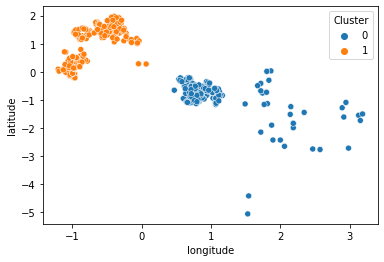

In [132]:
sns.scatterplot(x='longitude', y='latitude', hue="Cluster", data=scaled_df)

**-> longitude와 latitude를 기준으로 보았을 때, 2개의 군집으로 잘 분류된 것을 확인할 수 있다.**

#### 3개의 변수 (price, land_size_new, bedroom_count)를 사용하여 3차원으로 시각화해보기

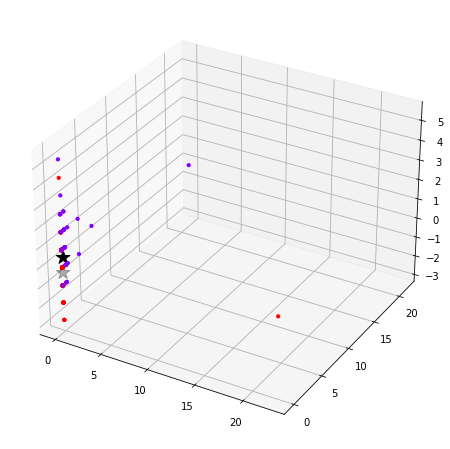

In [128]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터 scatterplot
ax.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], scaled_df.iloc[:,2], c = scaled_df.Cluster, s = 10, cmap = "rainbow", alpha = 1)

# 중심점 scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

plt.show()

**-> 3개의 변수(price, land_size_new, bedroom_count)를 기준으로 봤을 때, 2개의 군집으로 잘 분류된 것을 확인할 수 있다.**

## 군집별 특징 확인 및 결론

In [129]:
cluster_mean= scaled_df.groupby('Cluster').mean()
cluster_mean

,price,land_size_new,bedroom_count,bathroom_count,parking_count,latitude,longitude
Cluster,,,,,,,
0,-0.045151,0.125040,0.391227,0.046846,0.288247,-0.850960,1.013138
1,0.035771,-0.099063,-0.309951,-0.037114,-0.228365,0.674176,-0.802662


- Cluster0: 가격이 싸고 땅 크기가 크고 방 수도 많은 지역 즉, **집값이 싼 지역**
- Cluster1: 가격이 비싼 것에 비해 땅 크기가 작고 방 수도 적은 지역 즉, **집값이 비싼 지역**